In [4]:
from math import sin, cos
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy

%matplotlib inline

In [48]:
def plot_cylinder_element(x, z, dz, rx = 5, ry = 5, color = "b"):
    """
    x: left, right
    z: start height
    dz: height of cylinder
    rx, ry = radius of width (x) and depth (y)
    color = color

    Inspired by:
http://matplotlib.1069221.n5.nabble.com/plot-surface-shading-and-clipping-error-td14031.html
    """

    N = 50             # number of elements
    # a lower stride will give more faces. A cylinder with 4 faces is a cube :)
    # I think with N=100 and rstride=2, it will have 50 faces
    # cstride is the height, rstride the circle
    cstride_side = 1000 # only 1 element needed
    rstride_side = 1    # many elements to make a nice cylinder shape
    cstride_top = 10    
    rstride_top = 10

    # parameters of cylinder
    phi = numpy.linspace(0, 2 * numpy.pi, N) 
    _r = numpy.ones(N) 
    _h = numpy.linspace(0, 1, N) 

    # cylinder
    _x = rx * numpy.outer(numpy.cos(phi), _r) + x
    _y = ry * numpy.outer(numpy.sin(phi), _r) 
    _z = dz * numpy.outer(numpy.ones(numpy.size(_r)), _h) + z
    ax.plot_surface(_x, _y, _z, rstride = rstride_side, cstride = cstride_side, linewidth = 0, alpha = 1, color = color) 

    # to cover the gaps between the faces, plot the cylinder again at a slightly smaller radius
    _x *= 0.99
    _y *= 0.99
    ax.plot_surface(_x, _y, _z, rstride = rstride_side + 1, cstride = cstride_side + 1, linewidth=0, alpha=1, color = color) 

    # top
    _x = rx * numpy.outer(numpy.cos(phi), _h) + x
    _y = ry * numpy.outer(numpy.sin(phi), _h) 
    _z = numpy.zeros([N,N]) + z + dz + 0.1
    ax.plot_surface(_x, _y, _z,  rstride = rstride_top, cstride = cstride_top, linewidth = 0, alpha = 1, color = color) 

    #plot again with different stride to mask the gaps    
    ax.plot_surface(_x, _y, _z, rstride = rstride_side + 1, cstride = cstride_side + 1, linewidth=0, alpha=1, color = color) 

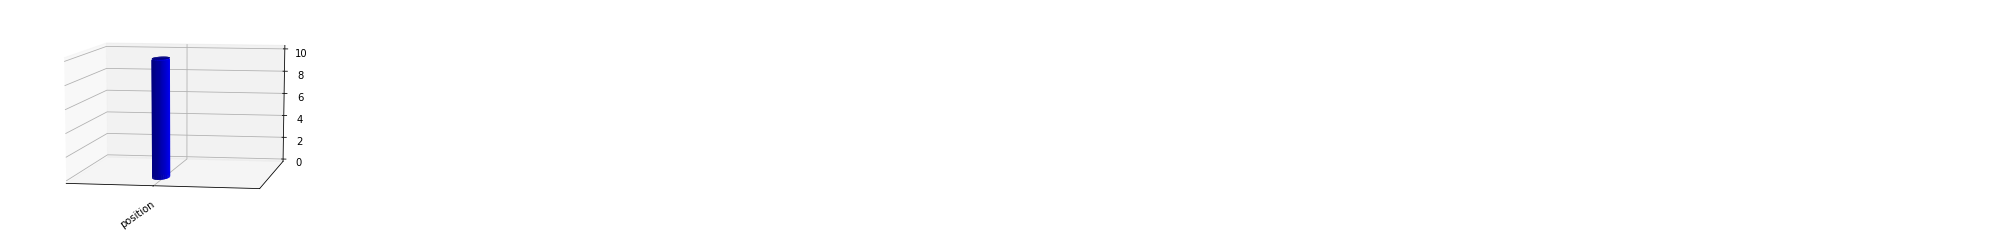

In [54]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.view_init(elev=10, azim=-80)
x = 20 # center
z = 0 # start height
dz = 10 # height of cyclinder
ax.set_xlim(-30, 80)
ax.set_ylim(-10, 40)
ax.yaxis.set_visible(False)
ax.get_yaxis().set_ticks([])
labels = ['position']
plt.xticks([20], labels, rotation=35,
           horizontalalignment='right', rotation_mode='anchor' )
plot_cylinder_element(x, z, dz)